In [1]:
import numpy as np

In [2]:


 # Creating data set
# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

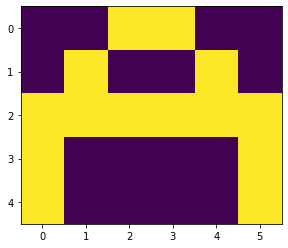

In [3]:
import matplotlib.pyplot as plt

plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [4]:
# converting data and labels into numpy array
""" convert the matrix of 0 and 1 into one hot vector so that we can directly feed it to the neural network,
these vectors are then stored in a list x"""

x = [np.array(a).reshape(1,30),np.array(b).reshape(1,30), np.array(c).reshape(1,30)]

In [5]:
# labels are also converted into a NumPy array
y = np.array(y)

print(x,"\n\n",y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


### *Step 4:* Defining the architecture or structure of the DNN.  This includes deciding the number of layers and the number of nodes in each layer

This NN will have the structure:
   - 1st layer: Input Layer (1,30)
   - 2nd Layer: Hidden Layer (1,5)
   - 3rd layer: Output layer (3,3)

In [6]:
# activation function
def sigmoid(x):
   return(1/(1+ np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer (1, 30)
# 1 hidden layer (1, 5)
# 1 output layer (3, 3)

def f_forward(x, w1, w2):
   # hidden
   z1 = x.dot(w1) # input from layer 1
   a1 = sigmoid(z1) # output of layer 2

   #output layer
   z2 = a1.dot(w2)
   a2 = sigmoid(z2)
   return (a2)

def generate_wt(x,y):
   l = []
   for i in range (x * y):
      l.append(np.random.randn())
   return (np.array(l).reshape(x,y))

def loss(out, Y):
   s = (np.square(out-Y))
   s = np.sum(s)/len(y)
   return (s)

# back propagation of error
def back_prop(x,y,w1,w2,alpha):
   # hidden layer
   z1 = x.dot(w1)
   a1 = sigmoid(z1)

   # output layer
   z2 = a1.dot(w2) #input of output layer
   a2 = sigmoid(z2) # output of out layer

   # error in output layer
   d2 = (a2-y)
   d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),(np.multiply(a1,1-a1)))

   # gradient for w1 and w2
   w1_adj = x.transpose().dot(d1)
   w2_adj = a1.transpose().dot(d2)

   # updating parameters
   w1 = w1-(alpha * (w1_adj))
   w2 = w2-(alpha * (w2_adj))

   return (w1,w2)

def train (x, Y, w1,w2, alpha = 0.01, epoch = 10):
   acc = []
   losss = []

   for j in range(epoch):
      l = []
      for i in range(len(x)):
         out = f_forward(x[i],w1,w2)
         l.append((loss(out,Y[i])))
         w1,w2 = back_prop(x[i], y[i], w1, w2, alpha)
      print("epochs: ",j+1, "======== acc:",(1-(sum(l)/len(x)))*100)
      acc.append((1))
      losss.append(sum(l)/len(l))
   return (acc,loss,w1,w2)

def predict(x,w1,w2):
   Out = f_forward(x,w1,w2)
   maxm = 0
   k = 0
   for i in range(len(Out[0])):
      if (maxm<Out[0][i]):
         maxm = Out[0][i]
         k=1
   if k == 0:
      print("Image is of letter A.")
   elif k == 1:
      print("Image is of letter B.")
   else:
      print("Images is of letter C.")

   plt.imshow(x.reshape(5,6))
   plt.show()

In [7]:
w1 = generate_wt(30,5)
w2 = generate_wt(5,3)
print(w1,"\n\n",w2)

[[-8.92681311e-01  4.61664524e-01  4.11013939e-01  1.06269430e+00
   1.24788770e-01]
 [ 1.28161093e-01 -8.48869118e-01 -1.95941078e+00  3.25543546e-01
   1.31488511e+00]
 [-5.50229556e-01 -1.95678423e+00  1.00863869e+00  7.45380409e-01
  -7.16676017e-01]
 [-8.70161958e-01  2.42927622e-01  6.79713803e-01 -2.13924652e+00
  -1.43946285e+00]
 [-1.16001973e+00  1.02103892e+00  1.22285155e+00 -8.99458790e-01
   1.23418519e+00]
 [ 3.65282100e-01 -1.39376852e+00  1.20374748e+00 -1.17371877e+00
   1.92609023e+00]
 [ 1.61094265e+00  1.22830438e-01 -7.78816331e-01  3.15336100e-01
   8.71591918e-01]
 [ 2.35705419e-03 -4.70908109e-01 -5.83153703e-01 -1.48147182e-01
   9.86913347e-01]
 [-5.84865975e-01  3.73062537e-01  1.38202371e+00  1.68508245e+00
  -3.08961070e-01]
 [ 1.09486766e+00 -4.58985775e-01 -3.55725089e-01  4.85096455e-01
  -7.90221795e-01]
 [ 8.48482766e-01 -5.77505425e-01  3.03912620e-01  1.11751168e+00
   4.41252525e-01]
 [-1.80932689e+00  6.28508490e-01 -5.26471240e-01 -2.55406204e+00

In [17]:
"""The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs:  1 ======== acc: 97.4751084413783
epochs:  2 ======== acc: 97.51645579922341
epochs:  3 ======== acc: 97.55693518424408
epochs:  4 ======== acc: 97.59656995377777
epochs:  5 ======== acc: 97.63538276347725
epochs:  6 ======== acc: 97.67339558477026
epochs:  7 ======== acc: 97.71062972190565
epochs:  8 ======== acc: 97.74710582858225
epochs:  9 ======== acc: 97.78284392416005
epochs:  10 ======== acc: 97.81786340945689
epochs:  11 ======== acc: 97.85218308213774
epochs:  12 ======== acc: 97.88582115170644
epochs:  13 ======== acc: 97.91879525411437
epochs:  14 ======== acc: 97.9511224660029
epochs:  15 ======== acc: 97.98281931860048
epochs:  16 ======== acc: 98.01390181129817
epochs:  17 ======== acc: 98.04438542493075
epochs:  18 ======== acc: 98.0742851347931
epochs:  19 ======== acc: 98.10361542342444
epochs:  20 ======== acc: 98.13239029319543
epochs:  21 ======== acc: 98.16062327873477
epochs:  22 ======== acc: 98.18832745923383
epochs:  23 ======== acc: 98.21551547066834


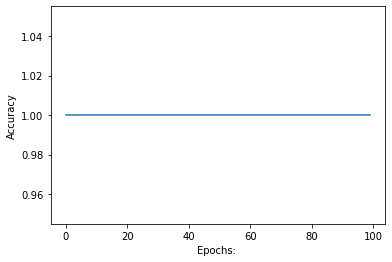

In [18]:
import matplotlib.pyplot as plt1

plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs: ")
plt1.show()

TypeError: float() argument must be a string or a number, not 'function'

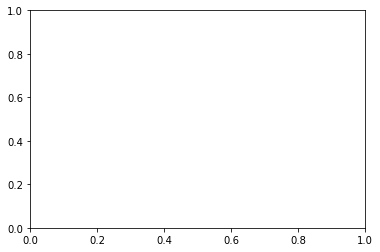

In [19]:
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [20]:
# the trained weights are
print(w1, "\n", w2)

[[-8.92681311e-01  4.61664524e-01  4.11013939e-01  1.06269430e+00
   1.24788770e-01]
 [-9.23849464e-02 -1.15897145e+00 -2.20760728e+00  3.83752386e-01
   1.63827257e+00]
 [-8.61132740e-01 -2.49351427e+00  8.55540790e-01  4.47233388e-01
  -6.44052994e-01]
 [-1.18106514e+00 -2.93802421e-01  5.26615902e-01 -2.43739354e+00
  -1.36683983e+00]
 [-1.38056577e+00  7.10936583e-01  9.74655043e-01 -8.41249949e-01
   1.55757264e+00]
 [ 3.65282100e-01 -1.39376852e+00  1.20374748e+00 -1.17371877e+00
   1.92609023e+00]
 [ 1.61094265e+00  1.22830438e-01 -7.78816331e-01  3.15336100e-01
   8.71591918e-01]
 [-3.08546130e-01 -1.00763815e+00 -7.36251604e-01 -4.46294203e-01
   1.05953637e+00]
 [-5.84865975e-01  3.73062537e-01  1.38202371e+00  1.68508245e+00
  -3.08961070e-01]
 [ 1.09486766e+00 -4.58985775e-01 -3.55725089e-01  4.85096455e-01
  -7.90221795e-01]
 [ 7.92652835e-01  3.85001154e-01  2.85957925e-01  1.62268923e+00
  -9.43847124e-03]
 [-1.80932689e+00  6.28508490e-01 -5.26471240e-01 -2.55406204e+00

Image is of letter B.


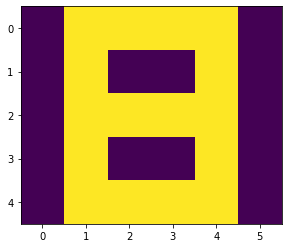

In [21]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)